In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

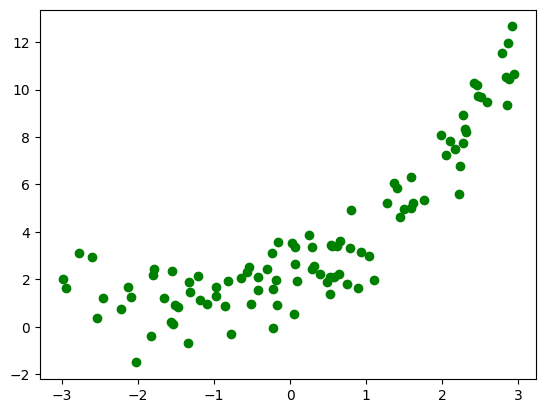

In [ ]:
X = 6 * np.random.rand(100 , 1) - 3
y = 0.5 * X**2 + 1.5* X + 2 +np.random.randn(100 , 1)
# Quadratic Equation used  
plt.scatter(X, y , color = 'green')

In [ ]:
print(X.shape , y.shape)

(100, 1) (100, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.25 , random_state=42)


In [ ]:
from sklearn.linear_model import  LinearRegression
regression_1 = LinearRegression()

In [ ]:
print(X_train.shape, y_train.shape)  # Both shapes should match in number of rows
regression_1.fit(X_train, y_train)  # Now try fitting again


(75, 1) (75, 1)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score  = r2_score(y_test , regression_1.predict(X_test))
score

0.5886964963860728

Text(0, 0.5, 'y')

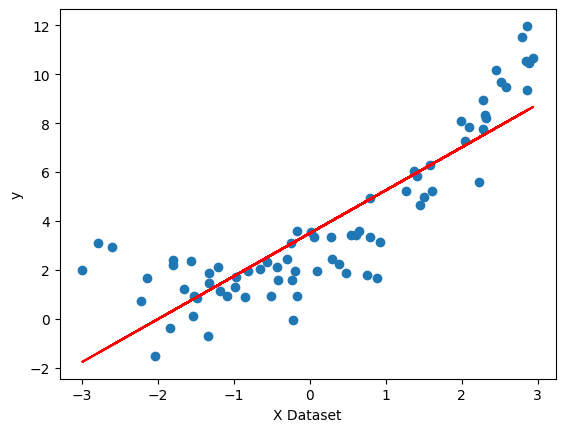

In [ ]:
plt.plot(X_train , regression_1.predict(X_train) , color = 'r')
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly

array([[ 1.00000000e+00,  1.61082689e+00,  2.59476328e+00],
       [ 1.00000000e+00,  2.31969660e+00,  5.38099230e+00],
       [ 1.00000000e+00,  1.45118081e+00,  2.10592574e+00],
       [ 1.00000000e+00,  2.51177911e+00,  6.30903429e+00],
       [ 1.00000000e+00,  2.86078478e+00,  8.18408954e+00],
       [ 1.00000000e+00,  1.27273080e+00,  1.61984370e+00],
       [ 1.00000000e+00,  9.26575288e-01,  8.58541765e-01],
       [ 1.00000000e+00,  4.82261553e-01,  2.32576206e-01],
       [ 1.00000000e+00,  9.29343324e-02,  8.63679013e-03],
       [ 1.00000000e+00,  2.22254156e+00,  4.93969099e+00],
       [ 1.00000000e+00, -8.56725624e-01,  7.33978795e-01],
       [ 1.00000000e+00,  1.37298670e+00,  1.88509247e+00],
       [ 1.00000000e+00, -2.19817240e-01,  4.83196191e-02],
       [ 1.00000000e+00, -2.31168638e-01,  5.34389391e-02],
       [ 1.00000000e+00, -1.34299449e+00,  1.80363419e+00],
       [ 1.00000000e+00,  2.24128824e-02,  5.02337297e-04],
       [ 1.00000000e+00, -1.90758652e-01

In [ ]:
X_test_poly

array([[ 1.00000000e+00, -7.74690164e-01,  6.00144850e-01],
       [ 1.00000000e+00,  1.04159357e+00,  1.08491717e+00],
       [ 1.00000000e+00,  2.16526599e+00,  4.68837681e+00],
       [ 1.00000000e+00,  2.41363686e+00,  5.82564289e+00],
       [ 1.00000000e+00,  3.11296345e-01,  9.69054144e-02],
       [ 1.00000000e+00, -2.46122819e+00,  6.05764420e+00],
       [ 1.00000000e+00,  5.30590504e-01,  2.81526283e-01],
       [ 1.00000000e+00,  1.75632019e+00,  3.08466060e+00],
       [ 1.00000000e+00,  2.47292998e+00,  6.11538270e+00],
       [ 1.00000000e+00,  6.43923898e-02,  4.14637986e-03],
       [ 1.00000000e+00,  2.91699122e+00,  8.50883776e+00],
       [ 1.00000000e+00,  1.58705932e+00,  2.51875729e+00],
       [ 1.00000000e+00,  5.38787121e-01,  2.90291562e-01],
       [ 1.00000000e+00,  2.22863617e+00,  4.96681918e+00],
       [ 1.00000000e+00, -2.08762259e+00,  4.35816809e+00],
       [ 1.00000000e+00,  6.44534214e-01,  4.15424353e-01],
       [ 1.00000000e+00,  4.81542450e-02

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly , y_train)
y_pred  = regression.predict(X_test_poly)
score = r2_score(y_test , y_pred)
print(score)


0.8703143210041939


In [ ]:
print(regression.coef_)

[[0.         1.46819599 0.52994358]]


Text(0, 0.5, 'y')

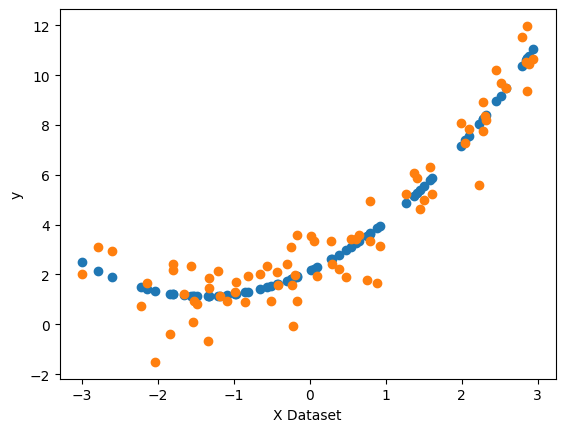

In [ ]:
plt.scatter(X_train , regression.predict(X_train_poly))
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")

## PipeLine 

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def poly_regression(X_train, y_train, X_test, y_test, degree):
    # Generate a range of values for smooth prediction
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    # Define polynomial regression pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    
    # Fit model on training data
    poly_regression.fit(X_train, y_train)
    
    # Predict using the model for smooth curve
    y_pred_new = poly_regression.predict(X_new)
    
    # Plot prediction curve
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}")
    
    # Plot training and test data as scatter plots
    plt.scatter(X_train, y_train, color="blue", label="Training data")
    plt.scatter(X_test, y_test, color="green", label="Test data")
    
    # Final plot details
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, np.min(y_train)-1, np.max(y_train)+2])
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.show()

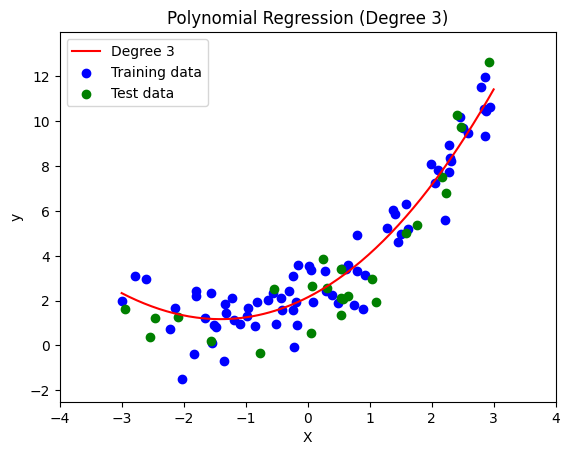

In [ ]:
poly_regression(X_train, y_train, X_test, y_test, 3)